# Capitulo 3.- Analizando series temporales

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import calendar
import matplotlib
import matplotlib.pyplot as plt
from pylab import*
%matplotlib inline 
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 5)
import matplotlib as mpl
#mpl.style.available

### Visualizando nuestro dataframe

In [7]:
df = pd.read_csv('data/alltopics.csv', index_col=0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12545 entries, 0 to 12544
Data columns (total 11 columns):
Usuario        12545 non-null object
Nombre         12545 non-null object
Fecha          12545 non-null object
Tweet          12545 non-null object
RT             12545 non-null int64
like           12545 non-null int64
path           12545 non-null object
verificados    235 non-null object
tópico         12545 non-null object
sentimiento    12545 non-null float64
categoría      12545 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB
None


In [8]:
df.head()

,Usuario,Nombre,Fecha,Tweet,RT,like,path,verificados,tópico,sentimiento,categoría
0,@jaymee_danielle,zen kitty,10 dic. 2017,issues i have w/ GMO:\n• doesnt taste “natural...,67,179,/jaymee_danielle/status/939965734196842496,NaN,Allergy,0.0900,Neutral
1,@systecdb,Dave Baggett,10 dic. 2017,It dawns on me that before GMO foods became pr...,0,1,/systecdb/status/939776697724997632,NaN,Allergy,0.4767,Positivo
2,@saltedveg,ingin punya tuyul saja,10 dic. 2017,Coz it's 'cool'. Just like people who suddenly...,1,1,/saltedveg/status/939675324765298688,NaN,Allergy,0.9068,Positivo
3,@RMathebulo,Rantho Mathebulo,9 dic. 2017,Alcoholism gout acne genetically modified food...,0,0,/RMathebulo/status/939601946960453633,NaN,Allergy,-0.7412,Negativo
4,@carmelabny,JOSEPHINE BOLOGNA,8 dic. 2017,Foods to eat every day and a healthy product t...,7,4,/carmelabny/status/939102225800028160,NaN,Allergy,0.4738,Positivo


In [10]:
df.dtypes

Usuario         object
Nombre          object
Fecha           object
Tweet           object
RT               int64
like             int64
path            object
verificados     object
tópico          object
sentimiento    float64
categoría       object
dtype: object

### Convirtiendo la columna fecha como serie temporal

In [19]:
meses = {}
meses['ene.'] = '01'
meses['feb.'] = '02'
meses['mar.'] = '03'
meses['abr.'] = '04'
meses['may.'] = '05'
meses['jun.'] = '06'
meses['jul.'] = '07'
meses['ago.'] = '08'
meses['sept.'] = '09'
meses['oct.'] = '10'
meses['nov.'] = '11'
meses['dic.'] = '12'

In [30]:
df['Fecha'][0].split(' ')[1]

'dic.'

In [21]:
if df['Fecha'][0].split(' ')[1] in meses:
    print(meses[df['Fecha'][0].split(' ')[1]])

12


In [34]:
nuevasfechas = []
for fecha in df['Fecha']:
    dia = fecha.split(' ')[0]
    mes = fecha.split(' ')[1]
    año = fecha.split(' ')[2]
    nuevomes = meses[mes]
    nuevafecha = año+'-'+nuevomes+'-'+dia
    nuevasfechas.append(nuevafecha)
df['serie_temporal'] = nuevasfechas
df.head()

    

,Usuario,Nombre,Fecha,Tweet,RT,like,path,verificados,tópico,sentimiento,categoría,serie_temporal
0,@jaymee_danielle,zen kitty,10 dic. 2017,issues i have w/ GMO:\n• doesnt taste “natural...,67,179,/jaymee_danielle/status/939965734196842496,NaN,Allergy,0.0900,Neutral,2017-12-10
1,@systecdb,Dave Baggett,10 dic. 2017,It dawns on me that before GMO foods became pr...,0,1,/systecdb/status/939776697724997632,NaN,Allergy,0.4767,Positivo,2017-12-10
2,@saltedveg,ingin punya tuyul saja,10 dic. 2017,Coz it's 'cool'. Just like people who suddenly...,1,1,/saltedveg/status/939675324765298688,NaN,Allergy,0.9068,Positivo,2017-12-10
3,@RMathebulo,Rantho Mathebulo,9 dic. 2017,Alcoholism gout acne genetically modified food...,0,0,/RMathebulo/status/939601946960453633,NaN,Allergy,-0.7412,Negativo,2017-12-9
4,@carmelabny,JOSEPHINE BOLOGNA,8 dic. 2017,Foods to eat every day and a healthy product t...,7,4,/carmelabny/status/939102225800028160,NaN,Allergy,0.4738,Positivo,2017-12-8


In [35]:
df['serie_temporal'] = pd.to_datetime(df['serie_temporal'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12545 entries, 0 to 12544
Data columns (total 12 columns):
Usuario           12545 non-null object
Nombre            12545 non-null object
Fecha             12545 non-null object
Tweet             12545 non-null object
RT                12545 non-null int64
like              12545 non-null int64
path              12545 non-null object
verificados       235 non-null object
tópico            12545 non-null object
sentimiento       12545 non-null float64
categoría         12545 non-null object
serie_temporal    12545 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 1.6+ MB


In [37]:
df = df.set_index(['serie_temporal'])
df.head()

,Usuario,Nombre,Fecha,Tweet,RT,like,path,verificados,tópico,sentimiento,categoría
serie_temporal,,,,,,,,,,,
2017-12-10,@jaymee_danielle,zen kitty,10 dic. 2017,issues i have w/ GMO:\n• doesnt taste “natural...,67,179,/jaymee_danielle/status/939965734196842496,NaN,Allergy,0.0900,Neutral
2017-12-10,@systecdb,Dave Baggett,10 dic. 2017,It dawns on me that before GMO foods became pr...,0,1,/systecdb/status/939776697724997632,NaN,Allergy,0.4767,Positivo
2017-12-10,@saltedveg,ingin punya tuyul saja,10 dic. 2017,Coz it's 'cool'. Just like people who suddenly...,1,1,/saltedveg/status/939675324765298688,NaN,Allergy,0.9068,Positivo
2017-12-09,@RMathebulo,Rantho Mathebulo,9 dic. 2017,Alcoholism gout acne genetically modified food...,0,0,/RMathebulo/status/939601946960453633,NaN,Allergy,-0.7412,Negativo
2017-12-08,@carmelabny,JOSEPHINE BOLOGNA,8 dic. 2017,Foods to eat every day and a healthy product t...,7,4,/carmelabny/status/939102225800028160,NaN,Allergy,0.4738,Positivo


### Generate and Plot Number of Tweets over Different Time Periods

In [38]:
def f(x):
     return Series(dict(Number_of_tweets = x['Tweet'].count(), 
                        ))

In [39]:
daily_count = df.groupby(df.index.date).apply(f)
print(len(daily_count))
daily_count.head()

1422


,Number_of_tweets
2009-10-12,1
2009-10-20,1
2009-10-26,1
2009-11-14,1
2010-01-07,1


In [41]:
daily_count.index.name = 'date'
daily_count.head(5)

,Number_of_tweets
date,
2009-10-12,1
2009-10-20,1
2009-10-26,1
2009-11-14,1
2010-01-07,1


In [42]:
daily_count.tail(5)

,Number_of_tweets
date,
2017-12-07,12
2017-12-08,32
2017-12-09,19
2017-12-10,33
2017-12-11,54


In [43]:
daily_count.index.min()

datetime.date(2009, 10, 12)

In [44]:
daily_count.index.max()

datetime.date(2017, 12, 11)

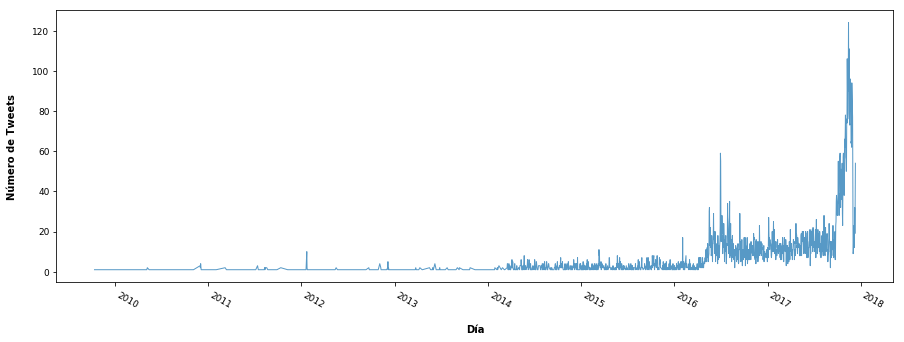

In [49]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)

daily_plot.set_xlabel('Día', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('Número de Tweets', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL

xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS

#http://matplotlib.org/users/legend_guide.html
#http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
#legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
#Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#daily_plot.xaxis.set_label_position('top')

savefig('img/daily counts.png', bbox_inches='tight', dpi=300, format='png')   #SAVE PLOT IN PNG FORMAT

### Generate and Plot Day-of-the-Week Tweets

In [50]:
weekday_count = df.groupby(df.index.weekday).apply(f)
print(len(weekday_count))
weekday_count

7


,Number_of_tweets
serie_temporal,
0,1826
1,1938
2,1972
3,1990
4,1803
5,1500
6,1516


In [52]:
days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
weekday_count['day'] = days
weekday_count

,Number_of_tweets,day
serie_temporal,,
0,1826,Lunes
1,1938,Martes
2,1972,Miércoles
3,1990,Jueves
4,1803,Viernes
5,1500,Sabado
6,1516,Domingo


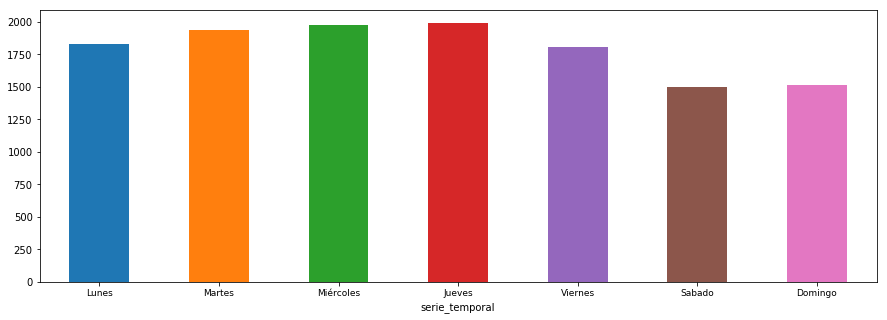

In [53]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9) #, ha ="left") 

###IF WE DON'T WANT TO CREATE ANOTHER COLUMN IN DATAFRAME WE CAN SET CUSTOM LABELS
#days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#xticks(np.arange(7), days, rotation = 0,fontsize = 9) #, ha ="left") 

savefig('img/day-of-week counts.png', bbox_inches='tight', dpi=300, format='png')

### Generate Monthly Tweet Count

In [54]:
monthly_count = df.groupby(df.index.month).apply(f)
monthly_count

,Number_of_tweets
serie_temporal,
1,587
2,455
3,526
4,594
5,945
6,1000
7,1145
8,934
9,900


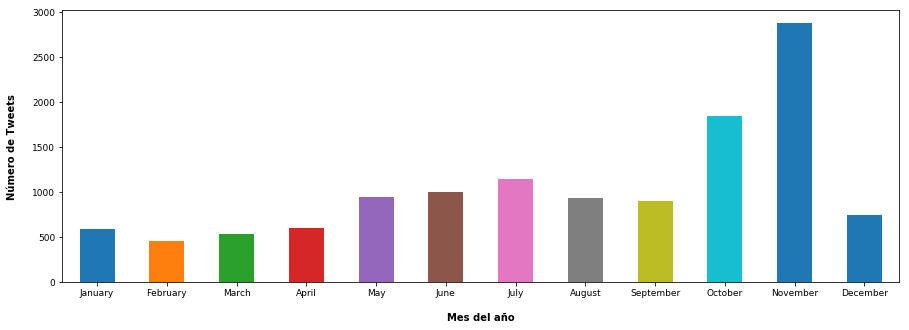

In [56]:
monthly_plot = monthly_count['Number_of_tweets'].plot(kind='bar')
months = list(calendar.month_name[1:])                                    #GENERATE LIST OF MONTHS
xticks(np.arange(12), months, rotation = 0,fontsize = 9)                  #USE THE CUSTOM TICKS

monthly_plot.set_xlabel('Mes del año', weight='bold', labelpad=15)  #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
monthly_plot.set_ylabel('Número de Tweets', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL

xticks(fontsize = 9, rotation = 0, ha= "center")                          #SET FONT SIZE FOR X-AXIS TICK LABELS
yticks(fontsize = 9)                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS
daily_plot.tick_params(axis='x', pad=5)                                   #SET PADDING ABOVE X-AXIS LABELS

daily_plot.legend_ = None                                                 #TURN OFF LEGEND

savefig('img/monthly counts - bar graph.png', bbox_inches='tight', dpi=300, format='png')

In [57]:
mpl.style.available

['seaborn-notebook',
 '_classic_test',
 'fivethirtyeight',
 'seaborn-paper',
 'seaborn-muted',
 'seaborn-dark-palette',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-dark',
 'Solarize_Light2',
 'seaborn-colorblind',
 'seaborn-talk',
 'bmh',
 'grayscale',
 'seaborn-darkgrid',
 'seaborn-poster',
 'seaborn-deep',
 'seaborn',
 'fast',
 'seaborn-whitegrid',
 'classic',
 'seaborn-bright',
 'ggplot',
 'seaborn-pastel',
 'dark_background']

In [58]:
mpl.style.use('ggplot')

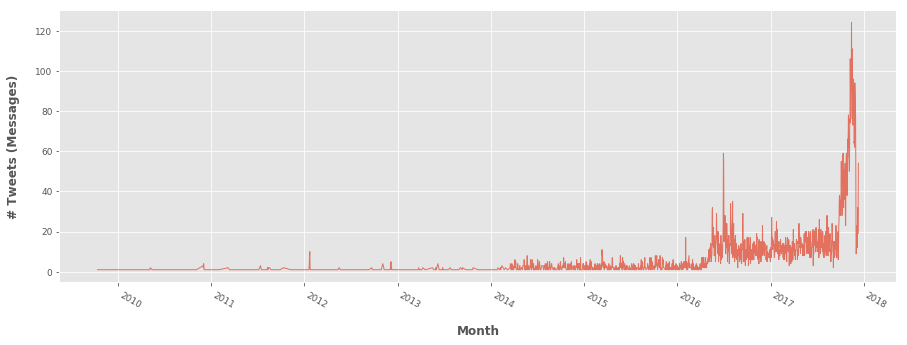

In [59]:
daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True, x_compat=True)
daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABE
xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS
daily_plot.legend_ = None
daily_plot.tick_params(axis='x', pad=5)

([<matplotlib.axis.XTick at 0x7ff9c0fd27b8>,
 <a list of 7 Text xticklabel objects>)

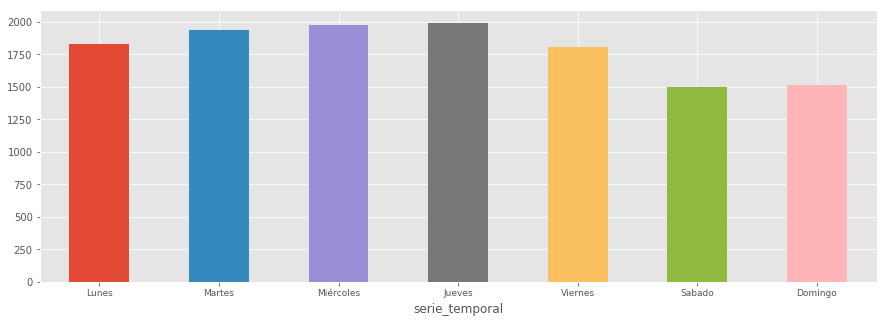

In [60]:
day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
xticks(np.arange(7), weekday_count['day'], rotation = 0, fontsize = 9) #, ha ="left") 

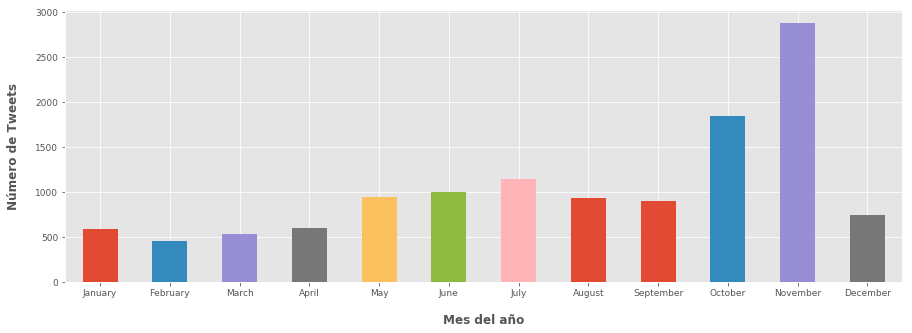

In [61]:
monthly_plot = monthly_count['Number_of_tweets'].plot(kind='bar')
months = list(calendar.month_name[1:])                                    #GENERATE LIST OF MONTHS
xticks(np.arange(12), months, rotation = 0,fontsize = 9)                  #USE THE CUSTOM TICKS

monthly_plot.set_xlabel('Mes del año', weight='bold', labelpad=15)  #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
monthly_plot.set_ylabel('Número de Tweets', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL

xticks(fontsize = 9, rotation = 0, ha= "center")                          #SET FONT SIZE FOR X-AXIS TICK LABELS
yticks(fontsize = 9)                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS
daily_plot.tick_params(axis='x', pad=5)                                   #SET PADDING ABOVE X-AXIS LABELS

daily_plot.legend_ = None                                                 #TURN OFF LEGEND